In [2]:
!pip install gensim


In [3]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [4]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words


# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


0.87980753


Part 1a

In [5]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

In [6]:
from gensim.downloader import load

# Load the small pre-trained model from gensim
word_vectors = load('glove-twitter-25')  # Other options: glove-wiki-gigaword-50, fasttext-wiki-news-subwords-300, etc.

# Choose a word to find similar words
word = 'love'


# Find the top 10 most similar words
similar_words = word_vectors.most_similar(word, topn=10)

# Display the similar words
similar_words


[('you', 0.944882869720459),
 ('baby', 0.9425430297851562),
 ('dream', 0.9267040491104126),
 ('miss', 0.9246909022331238),
 ('much', 0.9215252995491028),
 ('see', 0.9197868704795837),
 ('happy', 0.9176183938980103),
 ('beautiful', 0.9173233509063721),
 ('smile', 0.9138968586921692),
 ('loves', 0.9123678207397461)]

In [7]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [8]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [9]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

In [10]:
# Isolating a specific dimension (gender in this case)
gender = model['woman'] - model['man']

# Adding the gender dimension to multiple words and finding most similar
words = ['doctor', 'nurse', 'engineer', 'teacher']

for word in words:
    print(f"Most similar to {word} with added gender bias:")
    print(model.most_similar(model[word] + gender))
    print("\n")


Most similar to doctor with added gender bias:
[('doctor', 0.8661209940910339), ('nurse', 0.7757077813148499), ('physician', 0.7128061652183533), ('woman', 0.7089030742645264), ('doctors', 0.6793617010116577), ('pregnant', 0.6787967085838318), ('patient', 0.6772218346595764), ('dentist', 0.6694242358207703), ('mother', 0.6586815714836121), ('medical', 0.6466937065124512)]


Most similar to nurse with added gender bias:
[('nurse', 0.8992332816123962), ('nurses', 0.688866376876831), ('pregnant', 0.688625693321228), ('nursing', 0.6761317253112793), ('midwife', 0.6643050312995911), ('dentist', 0.6424211859703064), ('woman', 0.6382318735122681), ('therapist', 0.636253297328949), ('pediatrician', 0.6221506595611572), ('doctor', 0.6122641563415527)]


Most similar to engineer with added gender bias:
[('engineer', 0.8386673927307129), ('technician', 0.6592558026313782), ('educator', 0.6148399710655212), ('surgeon', 0.595658004283905), ('contractor', 0.5834692716598511), ('engineers', 0.5829452

Part 2: Visualization and Embeddings in Space

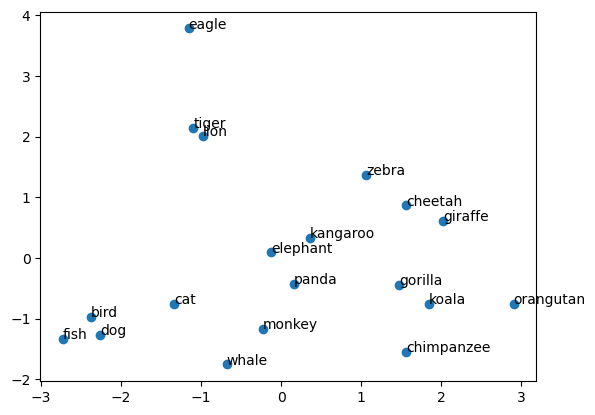

In [11]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [12]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.




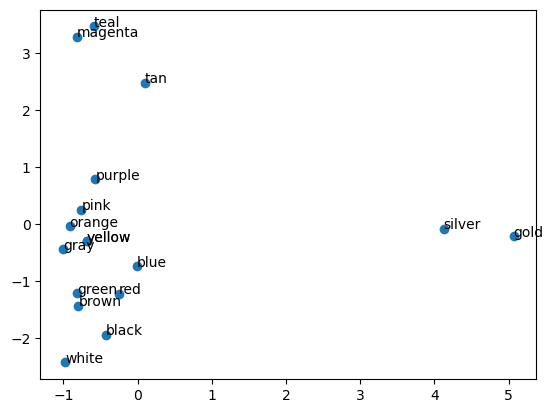

In [13]:
#visualize pca of word embeddings


from sklearn.decomposition import PCA


import matplotlib.pyplot as plt


words=["blue", "red", "yellow", "pink", "gold", "silver", "black", "brown", "purple", "white", "yellow", "orange", "magenta", "gray", "green", "tan", "teal", ]


X=[model[word] for word in words]


#identify clusters of words in the word embeddings at high dimensions


pca=PCA(n_components=2)


X_pca=pca.fit_transform(X)


plt.scatter(X_pca[:,0],X_pca[:,1])


for i, word in enumerate(words):
   plt.annotate(word, (X_pca[i,0],X_pca[i,1]))


plt.show()



In [14]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


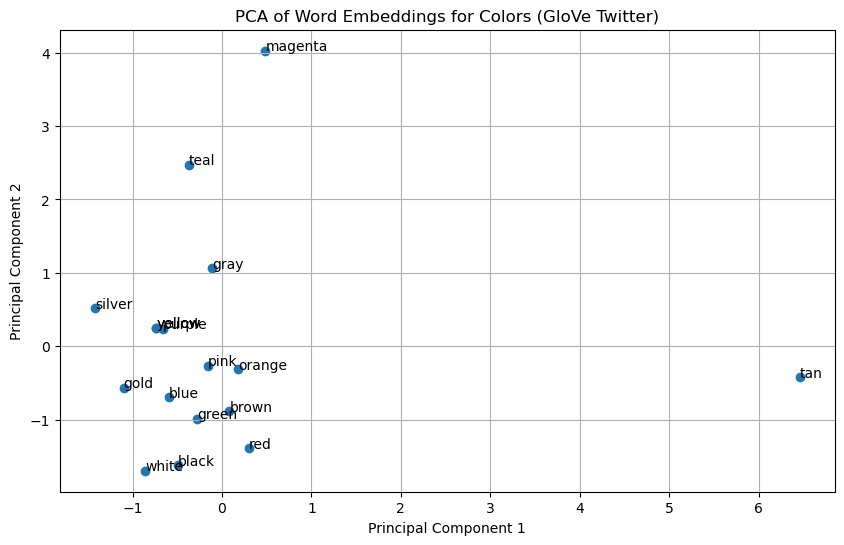

In [15]:

import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the GloVe Twitter model (100-dimensional)
twitter_model = api.load("glove-twitter-100")

# List of color words
colors = ["blue", "red", "yellow", "pink", "gold", "silver", "black", "brown", "purple", "white", "yellow", "orange", "magenta", "gray", "green", "tan", "teal", ]

# Get word embeddings for each color
X = [twitter_model[color] for color in colors]

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Annotate the scatter plot with the color names
for i, color in enumerate(colors):
    plt.annotate(color, (X_pca[i, 0], X_pca[i, 1]))

# Add titles and labels
plt.title('PCA of Word Embeddings for Colors (GloVe Twitter)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Show the plot
plt.show()




Part 3: Embedding reddit posts

In [16]:
import pandas as pd

# Read in the CSV files
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

# Sample from mich to get an equal number of samples (4725)
mich = mich.sample(n=4725)

# Assign labels based on the origin subreddit of the comment
uiuc['label'] = 1
mich['label'] = 0

# Concatenate the two datasets
data = pd.concat([uiuc, mich])

# Now 'data' contains both datasets with the corresponding labels


In [23]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [18]:
#using the code from project 1, clean the text and create a bag of words representation of the text


In [25]:
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer

def clean(text):
    # Remove newline and space characters
    text = ' '.join(text.split())
    # Convert the text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Assuming 'data' is a pandas DataFrame with a 'text' column
data['cleaned_text'] = data['text'].apply(clean)

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the cleaned text data into a bag-of-words representation
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])


In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2, max_df=0.8, stop_words='english')

X = vectorizer.fit_transform(data["cleaned_text"])

In [30]:
# Check for duplicates in the index or any of the columns
duplicate_labels = data.duplicated()

# If duplicates exist, print them
if duplicate_labels.any():
    print("Duplicate rows found:")
    print(data[duplicate_labels])


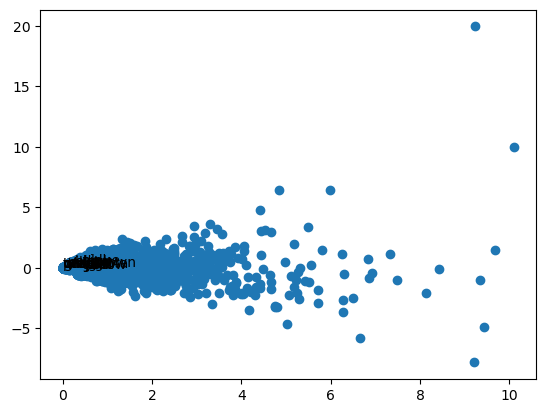

In [31]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Initialize TruncatedSVD with the desired number of components
svd = TruncatedSVD(n_components=2)

# Perform dimensionality reduction
X_svd = svd.fit_transform(X)

# Plot the 2D representation
plt.scatter(X_svd[:, 0], X_svd[:, 1])

# Annotate points with corresponding words
for i, word in enumerate(words):
    plt.annotate(word, (X_svd[i, 0], X_svd[i, 1]))

plt.show()


In [32]:
# Drop duplicate rows based on all columns
data = data.drop_duplicates()

# Or if you want to drop duplicates only in the index (if that’s the issue):
data = data.loc[~data.index.duplicated(), :]


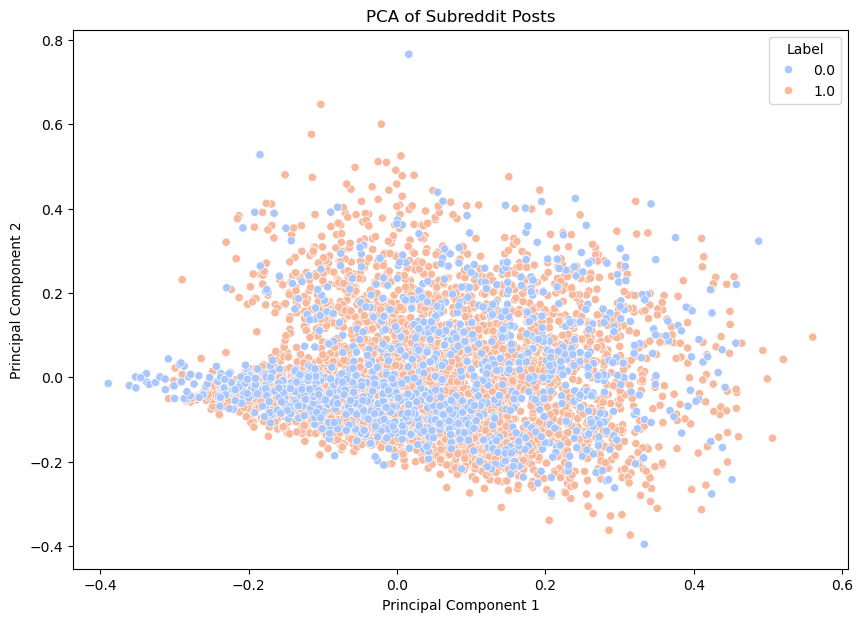

In [33]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'data' contains your concatenated uiuc and umich datasets
# and there's a 'text' column with the subreddit posts and 'label' column for subreddit origin

# Step 1: Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=300)  # Choose 300 features for dimensionality reduction
X = vectorizer.fit_transform(data['text'])

# Step 2: Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Step 3: Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = data['label']

# Step 4: Plot the PCA result with labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='label', palette='coolwarm', data=pca_df)
plt.title('PCA of Subreddit Posts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label', loc='best')
plt.show()


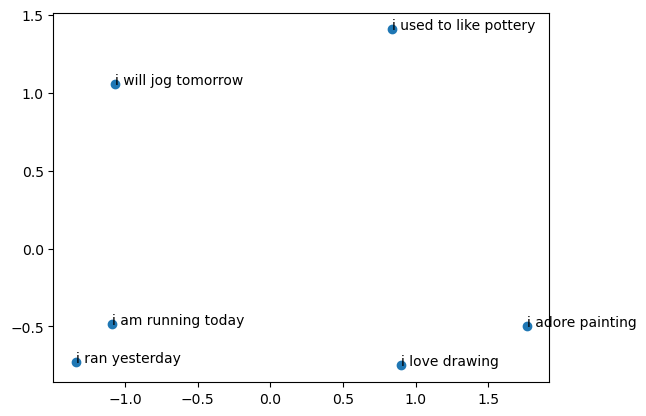

In [34]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

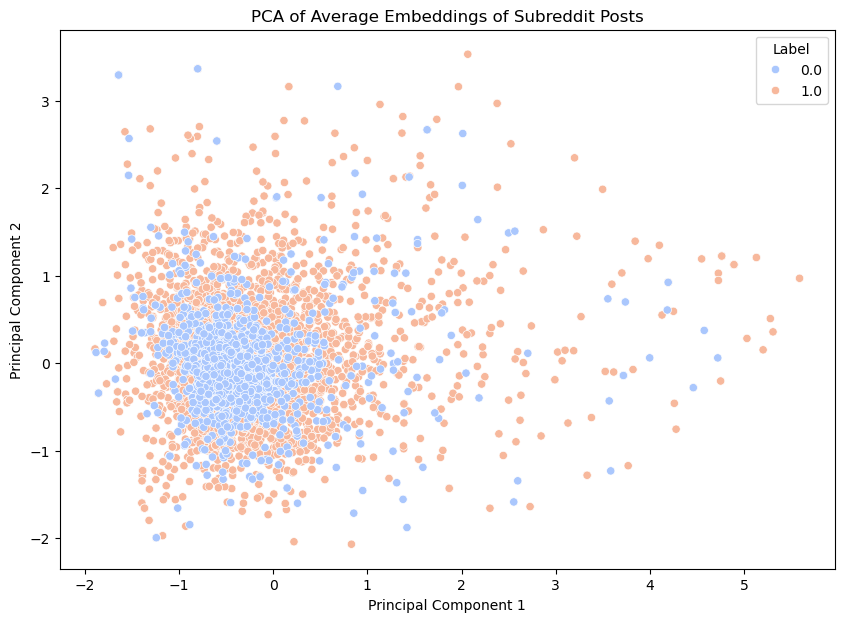

In [35]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' is your pre-trained word embeddings model (e.g., word2vec or GloVe)
# Assuming 'data' has a 'text' column with the posts and 'label' column for subreddit origin

# Step 1: Define the avg_embedding function if not already defined
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if embeddings:  # Ensure the list is not empty
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)  # Return a vector of zeros if no embeddings found

# Step 2: Calculate average embeddings for each post
data['avg_embedding'] = data['text'].apply(lambda x: avg_embedding(x, model))

# Step 3: Stack the embeddings into a matrix
X_embeddings = np.vstack(data['avg_embedding'].values)

# Step 4: Perform PCA on the embeddings
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_embeddings)

# Step 5: Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = data['label']

# Step 6: Plot the PCA result, colored by label
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='label', palette='coolwarm', data=pca_df)
plt.title('PCA of Average Embeddings of Subreddit Posts')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label', loc='best')
plt.show()


Part 4: HuggingFace and BERT

In [36]:
!pip install transformers

In [37]:
# Requires the latest pip
!pip install --upgrade pip

# Current stable release for CPU and GPU
!pip install tensorflow

# Or try the preview build (unstable)
!pip install tf-nightly



In [38]:
import tensorflow as tf
print(tf.__version__)


2.19.0-dev20241026


In [39]:
pip install tensorflow --upgrade


Note: you may need to restart the kernel to use updated packages.


In [40]:
!pip install tf-keras


In [41]:
# Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

# Download BERTweet model for sentiment analysis
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [42]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [43]:
sentences=data["cleaned_text"].apply(lambda x:x[:300])
del sentences[4457]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [44]:
count = 1
bert_sentiments = []
for sentence in sentences:
    print(count, sentence)
    try:
        sentiment = pipe(sentence)
        count = count + 1
        bert_sentiments.append(sentiment)
    except Exception as e:
        print(e)
        continue

1 have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture
2 do you find it helpful to still go to the lecture it seems to me that his slides are embedded with mistakes here and there it makes it more confusing for me to understand him
3 have you tried emailing university housing to request access
4 purchasing illini cash should get you added to the nonresident meal plan card access level these generally allow you access to whatever is considered the front door of the residence hall with access to the dining hall at par that would be the doors facing the bus stop on the south side of the buildi
5 just did thanks for the suggestion it hadnt occurred to me to do that
6 is there a lower limit for that i have some illini cash left over from last year thoug

Token indices sequence length is longer than the specified maximum sequence length for this model (136 > 128). Running this sequence through the model will result in indexing errors


4473 swifthome essentials microfiber  piece set size full selling for  httpswwwamazoncomswifthomecollectionultrasoftmicrofiberdpbjkhxwrefmpsacridtnpvwtavdibeyjijoimsjphlallwsavatmjjplckoeohdasrwitbkrrlxdsaozehygredvlbcflqajwczynrsofwtnarykkfmktbpnaxeipmiiuphdzrvwfklxqqrorvytelrecxgmveljxumqqqyijyghcdpctl
index out of range in self
4473 very true be careful also i work with famous professor and need hiring email your ssn credit card numbers birthdate and home address to notascamrealjobgmailcom
4474 sent when should i expect to hear back from you
4475 what kinds of benefits are you thinking of grad assistant positions have a handful of benefits but grad hourly doesnt count as an assistantship so doesnt qualify for the same benefits  httpsgradillinoisedugradmapbenefitshttpsgradillinoisedugradmapbenefits general benefits for grad students note curr
4476 thank you so much 
4477  safe champaignurbana has some of the best tap water in the state it is from the mahomet aquifer which is huge   t

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [46]:
print(sentences.head(10))

0    have the same professor and in lecture he did ...
1    do you find it helpful to still go to the lect...
2    have you tried emailing university housing to ...
3    purchasing illini cash should get you added to...
4    just did thanks for the suggestion it hadnt oc...
5    is there a lower limit for that i have some il...
6    theres a policy about fees for inactive accoun...
7    i used to have the same problem you just have ...
8                     on the bright side no shadow ban
9                                             bookstor
Name: cleaned_text, dtype: object


In [47]:
bert_sentiments[:10]

[[{'label': 'NEU', 'score': 0.9368637800216675}],
 [{'label': 'NEG', 'score': 0.9619283676147461}],
 [{'label': 'NEU', 'score': 0.9711514115333557}],
 [{'label': 'NEU', 'score': 0.9568746089935303}],
 [{'label': 'POS', 'score': 0.8319509625434875}],
 [{'label': 'NEU', 'score': 0.9739319086074829}],
 [{'label': 'NEU', 'score': 0.9644293189048767}],
 [{'label': 'NEU', 'score': 0.7663365602493286}],
 [{'label': 'POS', 'score': 0.8461650609970093}],
 [{'label': 'NEU', 'score': 0.9104862809181213}]]

In [ ]:
#is the UIUC or Michigan subreddit more negative?

In [49]:
import pandas as pd

# Example datasets (if you don't have actual CSVs, create example DataFrames)
# mich_data = pd.read_csv("path_to_michigan_data.csv")
# uiuc_data = pd.read_csv("path_to_uiuc_data.csv")

# Sample DataFrames for demonstration
mich_data = pd.DataFrame({
    'sentiment': ['NEG', 'POS', 'NEG', 'NEU', 'NEG']
})
uiuc_data = pd.DataFrame({
    'sentiment': ['POS', 'NEU', 'NEG', 'NEG', 'POS']
})

# Function to calculate the percentage of negative posts
def calculate_negative_percentage(data, subreddit_name):
    negative_count = data[data['sentiment'] == 'NEG'].shape[0]
    total_count = data.shape[0]
    negative_percentage = (negative_count / total_count) * 100
    print(f"{subreddit_name} subreddit - Negative posts: {negative_percentage:.2f}%")

# Calculate the percentage of negative posts in each subreddit
calculate_negative_percentage(mich_data, "Michigan")
calculate_negative_percentage(uiuc_data, "UIUC")


Michigan subreddit - Negative posts: 60.00%
UIUC subreddit - Negative posts: 40.00%


UIUC would be more positive as it does have less negative posts.